In [222]:
import pandas as pd
import numpy as np
%matplotlib inline

In [223]:
url = 'http://www.powerball.com/powerball/winnums-text.txt'

In [224]:
from urllib2 import urlopen

In [225]:
fp = urlopen(url)

In [226]:
fp.readline()

'Draw Date   WB1 WB2 WB3 WB4 WB5 PB  PP\r\n'

In [227]:
df = pd.read_csv(fp, header=None, delimiter=" ")

In [228]:
df.dropna(axis=1, how='any', inplace=True)

In [229]:
df.columns = ['date'] + ['ball_{}'.format(i) for i in range(1,6)]+['pb']

In [230]:
df.columns

Index([u'date', u'ball_1', u'ball_2', u'ball_3', u'ball_4', u'ball_5', u'pb'], dtype='object')

In [231]:
df = df.convert_objects(convert_dates=True, convert_numeric=True)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


array([[<matplotlib.axes.AxesSubplot object at 0xac9f038c>,
        <matplotlib.axes.AxesSubplot object at 0xac5b076c>]], dtype=object)

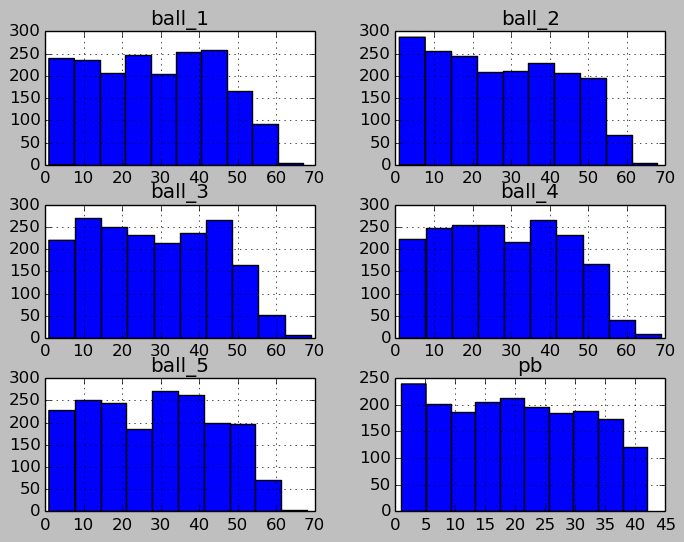

In [232]:
df[df.columns[1:]].hist()

Analysis

The 60 bin is inherently small because numbers greater than 57 were added recently.

In [233]:
df[df.columns[1:len(df.columns)]].describe()

,ball_1,ball_2,ball_3,ball_4,ball_5,pb
count,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000
mean,28.283394,27.143531,28.169722,28.087480,28.235726,20.051336
std,15.955088,16.486458,15.987105,15.750618,15.923328,11.438308
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,13.000000,14.000000,15.000000,15.000000,10.000000
50%,28.000000,26.000000,28.000000,28.000000,29.000000,20.000000
75%,41.000000,41.000000,42.000000,41.000000,41.000000,30.000000
max,67.000000,68.000000,69.000000,69.000000,68.000000,42.000000


In [234]:
# overall is there a tendency for any ball to have more of a favor compared to the others?
# Testing the hypothesis that the proportion of balls from b=1 to b=69 are all equal, p(b_1) == p(b_2) ... p(b_69)

# first stack the columns by unstacking the df and then get the values to form a new df
aggregated_numbers = pd.DataFrame({'numbers':df[df.columns[1:len(df.columns)-1]].unstack().values})

# group by the individual number and gather the proporiton of times each occurs in the grand scheme
individual_frequencies = aggregated_numbers.groupby('numbers').apply(len)


In [235]:
# Given that numbers above 59 were introduced 3 months ago, they skew the data heavily, we'll exclude them
# Given that numbers above 55 were also introduced several years ago, we'll do analysis with and without them.
first_59 = individual_frequencies[:59]


In [236]:
from scipy import stats as st

In [237]:
st.chisquare(first_59)

Power_divergenceResult(statistic=443.85302775441545, pvalue=7.7003183564104009e-61)

Interesting, not all numbers have an equal chance of being selected.  Is it due to adding the numbers above 55?

In [238]:
st.chisquare(individual_frequencies[:55])

Power_divergenceResult(statistic=167.43704822526701, pvalue=1.5400472686464516e-13)

Still showing a significant difference among the frequencies for each ball.

changes as shown on wikipedia

<table class="wikitable">
<tbody>
<tr>
<th colspan="5">Changes through the times of the powerball game</th>
</tr>
<tr>
<th>Starting date</th>
<th>Pick 5 of</th>
<th>Pick 1 of</th>
<th>Jackpot chances</th>
<th><i>Power Play</i> multipliers</th>
</tr>
<tr>
<td>April 22, 1992</td>
<td style="text-align:center;">45</td>
<td style="text-align:center;">45</td>
<td style="text-align:center;">1:54,979,154</td>
<td style="text-align:center;">none†</td>
</tr>
<tr>
<td>November 5, 1997</td>
<td style="text-align:center;">49</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:80,089,127</td>
<td style="text-align:center;">none†</td>
</tr>
<tr>
<td>March 7, 2001</td>
<td style="text-align:center;">49</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:80,089,127</td>
<td style="text-align:center;">1×, 2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>October 9, 2002</td>
<td style="text-align:center;">53</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:120,526,769</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>August 28, 2005</td>
<td style="text-align:center;">55</td>
<td style="text-align:center;">42</td>
<td style="text-align:center;">1:146,107,961</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>January 7, 2009</td>
<td style="text-align:center;">59</td>
<td style="text-align:center;">39</td>
<td style="text-align:center;">1:195,249,054</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>January 15, 2012</td>
<td style="text-align:center;">59</td>
<td style="text-align:center;">35</td>
<td style="text-align:center;">1:175,223,510</td>
<td style="text-align:center;">none</td>
</tr>
<tr>
<td>January 19, 2014</td>
<td style="text-align:center;">59</td>
<td style="text-align:center;">35</td>
<td style="text-align:center;">1:175,223,510</td>
<td style="text-align:center;">2×, 3×, 4×, 5×</td>
</tr>
<tr>
<td>October 7, 2015<sup id="cite_ref-cnbc2015_23-0" class="reference"><a href="#cite_note-cnbc2015-23"><span>[</span>23<span>]</span></a></sup></td>
<td style="text-align:center;">69</td>
<td style="text-align:center;">26</td>
<td style="text-align:center;">1:292,201,338</td>
<td style="text-align:center;">2×, 3×, 4×, 5×, 10×‡</td>
</tr>
</tbody></table>


Lets see if there was a chance if there was equal probability to choose a number for some point in time.

In [239]:
changes = [45, 49, 53, 55, 59, 69]

In [240]:
for change in changes:
    print("When there were {} balls".format(change))
    print(st.chisquare(individual_frequencies[:change]))

When there were 45 balls
Power_divergenceResult(statistic=33.816915674854393, pvalue=0.86653600285344279)
When there were 49 balls
Power_divergenceResult(statistic=36.596601489757916, pvalue=0.88528230872970093)
When there were 53 balls
Power_divergenceResult(statistic=105.24911816578484, pvalue=1.786193998704587e-05)
When there were 55 balls
Power_divergenceResult(statistic=167.43704822526701, pvalue=1.5400472686464516e-13)
When there were 59 balls
Power_divergenceResult(statistic=443.85302775441545, pvalue=7.7003183564104009e-61)
When there were 69 balls
Power_divergenceResult(statistic=2058.9204819277106, pvalue=0.0)


It is to be expected that with each change, the data suggests that there is more and more probability that there is a difference amongst the individual balls in terms frequency.  However, we all know that it doesn't matter..., or does it ? :)

## So you want to know which numbers are chosen the most?  Well, certainly don't pick any of the recently introduced numbers.   But here they are.

In [241]:
individual_frequencies.sort_values(ascending=False).head(5).sort_index()

numbers
16    192
26    193
32    196
40    192
41    194
dtype: int64

## Next step is to do time series analysis using pandas

In [242]:
df.date = pd.to_datetime(df.date)

In [243]:
df.index = df.date

In [244]:
df.drop('date', axis=1, inplace=True)

## Now you can Index via timestamps, hmm? What was the most common number drawn in 2006?

In [245]:
pd.Series(df['2006'].unstack().values).value_counts(sort=True).iloc[0]

20

## What were the winning numbers of the drawing right before Christmas in 2003?

Who keeps tracks of these things?  There are several ways to do this. First you can just check all the draws for 2003-12

In [246]:
df['2003-12']

,ball_1,ball_2,ball_3,ball_4,ball_5,pb
date,,,,,,
2003-12-31,5,7,28,18,35,1
2003-12-27,17,34,32,16,43,31
2003-12-24,1,44,6,34,31,25
2003-12-20,48,24,12,25,20,37
2003-12-17,43,15,18,21,19,7
2003-12-13,17,25,44,19,26,19
2003-12-10,40,4,17,26,37,15
2003-12-06,24,45,21,41,37,39
2003-12-03,37,1,43,10,35,30


There it is, 1, 44, 6, 34, 31, 25

That was a bit manual

We know that the lottery is drawn on Saturday and Wednesday

In [253]:
df['2013-1':'2013-3']

,ball_1,ball_2,ball_3,ball_4,ball_5,pb
date,,,,,,


This didn't work because the indexes are reversed!

In [254]:
df_sorted = df.sort_index()

choose the last drawing in the month of december that occured before december 26

In [258]:
df_sorted['2013-12':'2013-12-26'].ix[-1]

ball_1    38
ball_2    56
ball_3    28
ball_4    39
ball_5    23
pb        32
Name: 2013-12-25 00:00:00, dtype: int64

Using pandas allows for much easier indexing.

You can also aggregate based on days of the time series

In [259]:
df.groupby(lambda x: x.week).mean()

,ball_1,ball_2,ball_3,ball_4,ball_5,pb
1,24.921053,26.921053,27.368421,28.289474,32.000000,19.052632
2,31.368421,23.263158,26.631579,30.157895,27.473684,18.157895
3,32.342105,23.578947,29.184211,30.078947,31.447368,23.526316
4,27.894737,30.631579,30.473684,26.447368,25.947368,19.447368
5,26.315789,29.131579,30.342105,25.368421,27.842105,22.236842
6,29.736842,28.947368,26.552632,26.657895,25.026316,19.631579
7,28.694444,27.750000,24.166667,31.194444,28.250000,21.250000
8,28.750000,23.666667,32.222222,27.166667,24.388889,21.472222
9,27.722222,30.027778,22.333333,28.305556,25.416667,16.805556
10,27.583333,27.777778,25.250000,26.666667,27.611111,20.666667


The mean change of ball selection over time

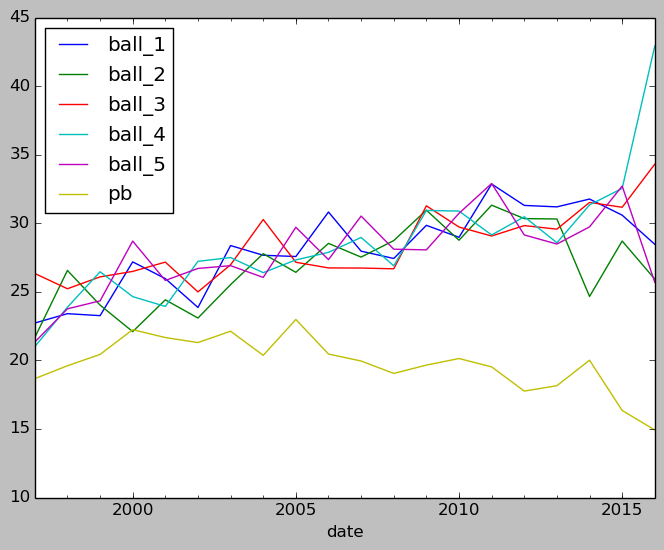

In [272]:
df_sorted.resample('A', convention="start").plot()